In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

# settings
LEARNING_RATE = 1e-4
# set to 20000 on local environment to get 0.99 accuracy
TRAINING_ITERATIONS = 2500        
    
DROPOUT = 0.5
BATCH_SIZE = 50

# set to 0 to train on all available data
VALIDATION_SIZE = 2000

# image number to output
IMAGE_TO_DISPLAY = 10

In [4]:
# read training data from CSV file 
data = pd.read_csv('./dataset/train.csv')

print('data({0[0]},{0[1]})'.format(data.shape))
print (data.head())

data(42000,785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0   

In [5]:
images = data.iloc[:,1:].values
images = images.astype(np.float)

print('images({0[0]},{0[1]})'.format(images.shape))


images(42000,784)


In [6]:
image_size = images.shape[1]
print ('image_size => {0}'.format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print ('image_width => {0}\nimage_height => {1}'.format(image_width,image_height))

image_size => 784
image_width => 28
image_height => 28


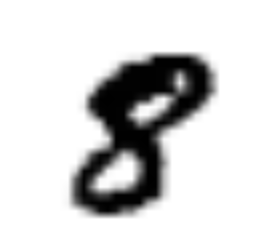

In [7]:
# display image
def display(img):
    image_size = img.shape[0]
    image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)
    # (784) => (28,28)
    one_image = img.reshape(image_width,image_height)
    
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)

# output image     
display(images[IMAGE_TO_DISPLAY])

In [8]:
labels_flat = data[[0]].values.ravel()

print('labels_flat({0})'.format(len(labels_flat)))
print ('labels_flat[{0}] => {1}'.format(IMAGE_TO_DISPLAY,labels_flat[IMAGE_TO_DISPLAY]))

labels_flat(42000)
labels_flat[10] => 8


In [9]:
labels_count = np.unique(labels_flat).shape[0]

print('labels_count => {0}'.format(labels_count))

labels_count => 10


In [10]:
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

labels = dense_to_one_hot(labels_flat, labels_count)
labels = labels.astype(np.uint8)

print('labels({0[0]},{0[1]})'.format(labels.shape))
print ('labels[{0}] => {1}'.format(IMAGE_TO_DISPLAY,labels[IMAGE_TO_DISPLAY]))

labels(42000,10)
labels[10] => [0 0 0 0 0 0 0 0 1 0]


In [11]:

# split data into training & validation
validation_images = images[:VALIDATION_SIZE]
validation_labels = labels[:VALIDATION_SIZE]

train_images = images[VALIDATION_SIZE:]
train_labels = labels[VALIDATION_SIZE:]


print('train_images({0[0]},{0[1]})'.format(train_images.shape))
print('validation_images({0[0]},{0[1]})'.format(validation_images.shape))

train_images(40000,784)
validation_images(2000,784)


In [12]:
train_labels_flat = labels_flat[VALIDATION_SIZE:]
validation_labels_flat = labels_flat[:VALIDATION_SIZE]

In [13]:
# read test data from CSV file 
test_images = pd.read_csv('./dataset/test.csv').values
test_images = test_images.astype(np.float)

print('test_images({0[0]},{0[1]})'.format(test_images.shape))


test_images(28000,784)


In [14]:
print(train_labels[0])
print(train_labels_flat[0])

[0 0 0 1 0 0 0 0 0 0]
3


In [15]:
def saveFileForSubmission(predicted_lables,custonFileName='submission.csv',customHeader='ImageId,Label'):
    result = np.c_[range(1,len(predicted_lables)+1),predicted_lables]

    np.savetxt(custonFileName, 
           result.astype(int), 
           delimiter=',', 
           header = customHeader, 
           comments = '', 
           fmt='%u,%u')

In [23]:
# modelLogregCV = logregCV.fit(validation_images, validation_labels_flat)
# total = len(images)
# offset = BATCH_SIZE
# modelLogregCV = logregCV.fit(images[:offset], labels_flat[:offset])
# while(total>offset):
#     offset = (offset+BATCH_SIZE) if total>(offset+BATCH_SIZE) else (total)
#     modelLogregCV = modelLogregCV.fit(images[offset-BATCH_SIZE:offset], labels_flat[offset-BATCH_SIZE:offset])
#     print(offset)
    
def fitInbatchProcess(model,images,labels=[],BATCH_SIZE=100):
    total = len(images)
    offset = BATCH_SIZE
    print("Total of instance %d"%total)
    if len(labels)>0:
        model.partial_fit(images[:offset], labels_flat[:offset])
    else:
        model.partial_fit(images[:offset])
    while(total>offset):
        
        offset = (offset+BATCH_SIZE) if total>(offset+BATCH_SIZE) else (total)
        if len(labels)>0:
            model.partial_fit(images[:offset], labels_flat[:offset])
        else:
            model.partial_fit(images[:offset])
    return model


Implementando um simples LogisticRegressionCV
---------------

In [14]:
from sklearn.linear_model import LogisticRegressionCV
logregCV = LogisticRegressionCV()

In [15]:
print(len(labels_flat),len(images))
labels_flat[:10]

(42000, 42000)


array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3], dtype=int64)

In [ ]:
logregCV.fit(train_images,labels_flat)
#can go wrong

In [27]:
modelLogregCV.predict_proba(train_images[200:210])


array([[  3.21147023e-12,   1.15803847e-05,   4.48877335e-06,
          1.01882829e-03,   2.86251336e-02,   5.51919532e-05,
          4.31819616e-07,   1.31411566e-06,   9.29941348e-04,
          9.69353090e-01],
       [  4.92257013e-06,   7.81267167e-05,   4.17218097e-08,
          2.40717304e-01,   1.32414174e-05,   5.61287391e-01,
          8.58848629e-05,   2.40337133e-07,   1.77431051e-01,
          2.03817975e-02],
       [  1.30553255e-10,   3.47018159e-05,   9.03169349e-01,
          7.65022110e-07,   1.40898835e-03,   3.56153078e-08,
          2.21360387e-03,   5.94928640e-07,   4.16944519e-03,
          8.90025161e-02],
       [  8.70114601e-13,   5.46219849e-07,   5.87299950e-09,
          5.68283540e-11,   9.52390856e-01,   7.95711592e-07,
          3.49226204e-05,   1.00875085e-03,   3.51582535e-04,
          4.62125406e-02],
       [  4.60018382e-07,   9.94290896e-01,   6.27288995e-06,
          5.91354665e-06,   1.60473965e-05,   8.03795127e-07,
          1.59477840e-05

In [21]:
modelLogregCV.predict(train_images[200:210])

array([9, 5, 4, 4, 2, 6, 1, 7, 3, 1], dtype=int64)

In [30]:
modelLogregCV.score(train_images[200:500],train_labels_flat[200:500])

0.81666666666666665

In [22]:
predicted_lables = modelLogregCV.predict(test_images)
predicted_lables[:10]

array([2, 0, 4, 9, 2, 7, 0, 3, 0, 4], dtype=int64)

In [23]:
saveFileForSubmission(predicted_lables,'submission2.csv')

Implementando um pre-training usando uma rede RBM e um modelo logistico
---------------

In [55]:
from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegressionCV



sGDRegressor = linear_model.SGDRegressor()
rbm = BernoulliRBM(random_state=0, verbose=True)
images = images[:8000]
test_images = test_images[:10000]
images = (images - np.min(images, 0)) / (np.max(images, 0) + 0.0001)  # 0-1 scaling
test_images = (test_images - np.min(test_images, 0)) / (np.max(test_images, 0) + 0.0001)  # 0-1 scaling

 

In [103]:
#####TESTE

X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
Y = np.array([False, False, False, True])

model = BernoulliRBM(n_components=2,verbose=0,n_iter=100,learning_rate=0.01)
# model.fit(X,Y)
model.fit(X)


BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=2, n_iter=100,
       random_state=None, verbose=0)

In [110]:
t1 = np.array([[1, 1, 1]]).reshape(1,-1)
t2 = np.array([[0, 0, 0]]).reshape(1,-1)
tt1 = np.array([[True]]).reshape(1,-1)
tt2 = np.array([[False]]).reshape(1,-1)
print(t1,t2,tt1,tt2)
print(model.transform(t1))
print(model.transform(t2))
print()
print(model.fit_transform(t1))
print(model.fit_transform(t2))
print()
print(model.fit_transform(t1,tt1))
print(model.fit_transform(t2,tt2))
print()
print(model.transform(t1))
print(model.transform(t2))


(array([[1, 1, 1]]), array([[0, 0, 0]]), array([[ True]], dtype=bool), array([[False]], dtype=bool))
[[ 0.03404341  0.03402762]]
[[ 0.12657187  0.12657426]]
()
[[ 0.03987697  0.0405394 ]]
[[ 0.1269633   0.12692855]]
()
[[ 0.03851654  0.03825919]]
[[ 0.12739222  0.12756871]]
()
[[ 0.03272194  0.03247449]]
[[ 0.12739222  0.12756871]]


In [56]:
# rbm.learning_rate = 0.06
# rbm.n_iter = 100
# More components tend to give better prediction performance, but larger
# fitting time
# rbm.n_components = 100


# rbm = fitInbatchProcess(rbm,images[:len(images)/10])
rbm.fit(images[:len(images)/10])
print(rbm)

# classifier = Pipeline(steps=[('rbm', rbm), ('SGDRegressor', sGDRegressor)])

[BernoulliRBM] Iteration 1, pseudo-likelihood = -211.18, time = 11.46s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -136.69, time = 20.49s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -126.43, time = 18.14s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -116.86, time = 17.22s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -110.10, time = 15.95s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -102.01, time = 13.08s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -101.35, time = 17.78s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -103.03, time = 16.90s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -97.00, time = 22.18s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -90.22, time = 16.28s
BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=256, n_iter=10,
       random_state=0, verbose=True)


In [57]:
testimagesFeatured = rbm.transform(test_images)

print(testimagesFeatured[0:1])
len(testimagesFeatured)

[[  2.72992859e-04   2.37449457e-01   1.67540356e-06   6.14220832e-08
    4.90626122e-05   3.23046138e-06   2.72281331e-04   3.27168912e-08
    6.96455264e-08   2.11134964e-10   2.85576090e-10   3.98100562e-05
    1.64409642e-04   9.26089115e-03   9.99999083e-01   1.00441493e-08
    3.46622369e-05   1.38094387e-03   5.56019564e-05   4.07765465e-02
    2.97941976e-03   3.16012543e-04   4.69900695e-04   2.67769902e-05
    9.97408626e-01   2.32321326e-06   9.00916798e-05   1.15178575e-04
    8.30920502e-08   1.66558136e-05   6.24341729e-06   1.57526941e-02
    1.46853270e-03   6.02943290e-06   9.51132650e-04   7.28496842e-09
    2.76698575e-04   9.75672080e-01   9.87428112e-01   3.76902977e-10
    2.59683829e-04   2.45228419e-05   1.34993905e-10   4.88155575e-08
    2.50497810e-06   7.36332564e-06   3.53833779e-05   2.09534516e-09
    2.58266605e-05   1.85597724e-07   9.36440377e-05   1.19276211e-03
    5.98955645e-04   1.36543543e-07   1.35410522e-05   3.87356169e-05
    5.60064841e-03  

10000

In [58]:
testimagesFeatured
len(testimagesFeatured[0])


256

In [59]:
# Training RBM-SGDRegressor 
imagesFeatured = rbm.fit_transform(images[len(images)/10:])
# print(imagesFeatured[0])
sGDRegressor = fitInbatchProcess(sGDRegressor,imagesFeatured,labels_flat[len(images)/10:])




[BernoulliRBM] Iteration 1, pseudo-likelihood = -120.03, time = 83.72s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -106.29, time = 143.94s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -103.94, time = 130.17s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -100.56, time = 162.11s


KeyboardInterrupt: 

In [52]:
testimagesFeatured = rbm.fit_transform(test_images)
predicted_lables = sGDRegressor.predict(testimagesFeatured)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -104.35, time = 109.32s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -95.93, time = 209078.34s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -94.08, time = 161.85s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -89.58, time = 155.22s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -88.47, time = 162.27s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -86.62, time = 131.13s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -88.04, time = 163.60s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -85.56, time = 174.38s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -91.38, time = 179.40s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -86.99, time = 206.49s


In [53]:
saveFileForSubmission(predicted_lables,'submission3.csv')

In [54]:
testimagesFeatured

array([[  6.15654101e-05,   9.99879631e-01,   8.57836124e-10, ...,
          1.15734659e-10,   6.49496885e-11,   2.10592972e-15],
       [  1.34542514e-05,   9.77053269e-18,   1.99724979e-08, ...,
          1.35554968e-15,   1.91641854e-09,   1.40242637e-15],
       [  9.97430032e-01,   3.46935776e-04,   5.20758398e-04, ...,
          2.01118634e-05,   5.55517242e-06,   2.19376984e-04],
       ..., 
       [  2.25821605e-04,   9.96466334e-01,   4.96533724e-03, ...,
          1.79670730e-11,   2.13035549e-10,   7.97337081e-16],
       [  1.35805650e-05,   1.20994242e-13,   4.50527136e-05, ...,
          2.18238844e-06,   7.38599641e-07,   9.99986262e-01],
       [  3.82498134e-03,   5.50574388e-09,   2.35481364e-05, ...,
          8.33967495e-07,   1.29693619e-04,   9.99901193e-01]])